In [3]:
import pandas as pd
import sqlite3
import requests

In [ ]:
conn = sqlite3.connect("datasets/data.db")
df = pd.read_sql_query("SELECT * FROM answers;", conn)

In [ ]:
try:
    sample = df.sample(100)
except requests.Timeout as err:
    print(err.message)

In [ ]:
try:
    # DANGER !!!
    df.user_id.nunique()
except requests.Timeout as err:
    print(err.message)

In [ ]:
sample.count()

In [ ]:
sample.user_id.nunique()

In [55]:
sample2 = pd.read_sql_query("SELECT * FROM answers LIMIT 2000;", conn)

In [ ]:
sample2.user_id.nunique()

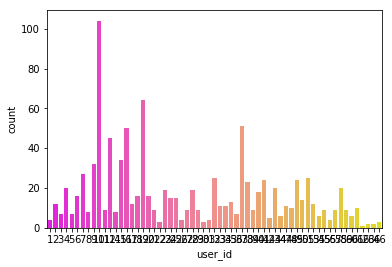

In [43]:
sns.countplot(x="user_id", palette="spring", data=sample2)

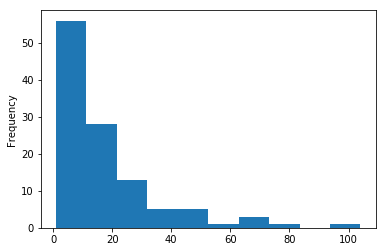

In [62]:
sample2['user_id'].value_counts().plot(kind='hist')

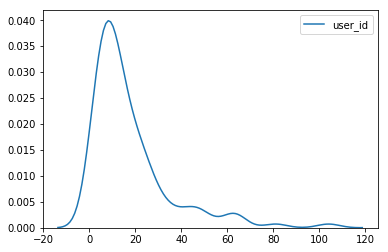

In [73]:
kde = sns.kdeplot(sample2.user_id.value_counts())

In [1]:
# sample2.user_id.value_counts()

In [75]:
kde

## Timestamp Stuff

In [82]:
sample.head()

,id,user_id,datestamp,r,g,b,colorname
849323,849324,38848,1.267684e+09,249,206,190,pink
583417,583418,27306,1.267597e+09,235,248,214,white
1121722,1121723,51329,1.267826e+09,44,152,171,blue
1706893,1706895,77696,1.268280e+09,147,11,118,purple
2644266,2644268,118730,1.269282e+09,64,88,138,blue


In [105]:
from datetime import datetime
def convert_timestamp(time):
    time = int(time)
    time = datetime.utcfromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S')
    return pd.Timestamp(time)

In [107]:
sample["datestamp"] = sample["datestamp"].apply(convert_timestamp)

In [108]:
sample.head()

,id,user_id,datestamp,r,g,b,colorname
849323,849324,38848,2010-03-04 06:20:05,249,206,190,pink
583417,583418,27306,2010-03-03 06:16:28,235,248,214,white
1121722,1121723,51329,2010-03-05 21:49:13,44,152,171,blue
1706893,1706895,77696,2010-03-11 04:04:12,147,11,118,purple
2644266,2644268,118730,2010-03-22 18:27:04,64,88,138,blue


In [4]:
xx_chrom_users = pd.read_csv("csv/xx_chrom_users.csv")

In [ ]:
df[df['user_id'].isin(xx_chrom_users)]